# Multiclass Logistic Regression Test

In [7]:
import numpy as np
import sklearn.linear_model as skl
import matplotlib.pyplot as plt
%matplotlib inline

from mlforge.multiclass.models import MulticlassLogisticRegression
from mlforge.regression.optimizers import GradientDescent, StocasticGradientDescent
from mlforge.regularizers import L2
from mlforge.multiclass.meta_algorithm import OneVsOne, OneVsAll 

## <input type="checkbox" checked> Randomly Generated Data - One vs All

In [ ]:
# Create test data
x_train = np.random.randint(-10, 10, (100, 4))
y_train = np.random.choice([-1, 0, 1], 100)

# mlforge
model = MulticlassLogisticRegression(regularizer=L2())
model.fit(x_train, y_train, epochs=100)
model_score = model.evaluate(x_train, y_train)[0]

# sklearn
clf = skl.LogisticRegression(solver="lbfgs", penalty="l2")
clf.fit(x_train, y_train)
clf_score = clf.score(x_train, y_train)

print("Forge   in-sample accuracy: {}".format(model_score))
print("Sklearn in-sample accuracy: {}".format(clf_score))

## <input type="checkbox" checked> 2d multiclass classification Test - One vs All

In [2]:
# Create data
x = np.random.rand(1000, 2)

x0 = x[x[:,0]+x[:,1]<0.3, :]
y0 = np.zeros(len(x0))

x1 = x[x[:,0]+x[:,1]>1.7, :]
y1 = np.ones(len(x1))

x2 = x[x[:,0]-x[:,1]>0.5, :]
y2 = np.empty(len(x2))
y2.fill(2)

x_train = np.vstack((x0, x1, x2))
y_train = np.hstack((y0, y1, y2))

In [ ]:
# mlforge
model = MulticlassLogisticRegression(optimizer=StocasticGradientDescent(), regularizer=None)
model.fit(x_train, y_train, epochs=100)
model_score = model.evaluate(x_train, y_train)[0]

# sklearn
clf = skl.LogisticRegression()
clf.fit(x_train, y_train)
clf_score = clf.score(x_train, y_train)

print("Forge   in-sample accuracy: {}".format(model_score))
print("Sklearn in-sample accuracy: {}".format(clf_score))

In [ ]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(131)
ax1.scatter(x_train[:,0], x_train[:,1], c=y_train, alpha=0.5)
ax1.set_title("Data")

ax2 = fig.add_subplot(132)
ax2.scatter(x_train[:,0], x_train[:,1], c=model.predict(x_train), alpha=0.5)
ax2.set_title("Forge")

ax3 = fig.add_subplot(133)
ax3.scatter(x_train[:,0], x_train[:,1], c=clf.predict(x_train), alpha=0.5)
ax3.set_title("Sklearn")

plt.show()

## <input type="checkbox" checked> 2d multiclass classification Test - One vs One 

In [3]:
# mlforge
model = MulticlassLogisticRegression(optimizer=StocasticGradientDescent(), meta_algorithm=OneVsOne())
model.fit(x_train, y_train, epochs=100)
model_score = model.evaluate(x_train, y_train)[0]

# sklearn
clf = skl.LogisticRegression()
clf.fit(x_train, y_train)
clf_score = clf.score(x_train, y_train)

print("Forge   in-sample accuracy: {}".format(model_score))
print("Sklearn in-sample accuracy: {}".format(clf_score))

Forge   in-sample accuracy: 1.0
Sklearn in-sample accuracy: 1.0


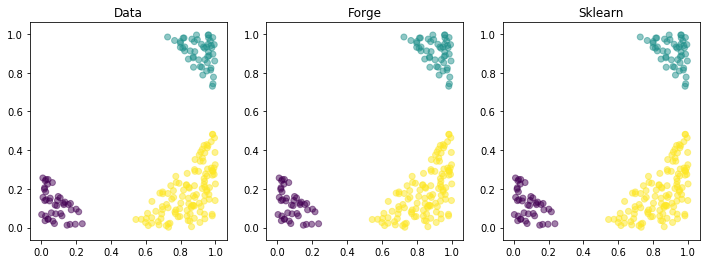

In [8]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(131)
ax1.scatter(x_train[:,0], x_train[:,1], c=y_train, alpha=0.5)
ax1.set_title("Data")

ax2 = fig.add_subplot(132)
ax2.scatter(x_train[:,0], x_train[:,1], c=model.predict(x_train), alpha=0.5)
ax2.set_title("Forge")

ax3 = fig.add_subplot(133)
ax3.scatter(x_train[:,0], x_train[:,1], c=clf.predict(x_train), alpha=0.5)
ax3.set_title("Sklearn")

plt.show()